# CSE4002
## Assessment 2

Student:    Tim Vos

Student#:   22843874

# Part 1, task 2 & 3

### Import the relevant dependencies 

In [13]:
# Imports the MNIST dataset from Keras, a classic collection of 70,000 grayscale images of handwritten digits (0-9).
from keras.datasets import mnist 

# Imports TensorFlow, the core open-source library from Google for building and training machine learning models. We use the alias 'tf' by convention.
import tensorflow as tf

# Imports the Adam optimiser. An optimiser is an algorithm that adjusts the model's internal parameters (weights) to minimise the error, and Adam is a popular, efficient choice.
from tensorflow.keras.optimizers import Adam

# Imports specific performance metrics. Metrics are used to evaluate how well the model is performing.
# Precision: Measures the accuracy of positive predictions.
# Recall: Measures the model's ability to find all the actual positive instances.
# Accuracy: Measures the overall fraction of correct predictions.
from tensorflow.keras.metrics import Precision, Recall, Accuracy

# Imports the History callback object. A 'callback' is a function that can be executed at different stages of training. The History object automatically records the metrics and loss values from each epoch.
from tensorflow.python.keras.callbacks import History

# Imports the ModelCheckpoint callback. This callback saves the model to a file during training, typically only when its performance on a validation metric improves.
from tensorflow.keras.callbacks import ModelCheckpoint

# Imports the Pandas library, a powerful tool for data manipulation and analysis. It's mainly used for working with structured data in tables called DataFrames. 'pd' is the standard alias.
import pandas as pd

# Imports the Sequential model type from Keras. This is the simplest way to build a model, by creating a linear stack of layers.
from keras.models import Sequential

# Imports different types of layers, which are the fundamental building blocks of a neural network.
# Dense: A standard, fully-connected layer where each neuron is connected to every neuron in the previous layer.
# Input: A special layer used to define the shape and data type of the model's input.
# Flatten: A layer that transforms a multi-dimensional input (like a 2D image) into a one-dimensional vector.
# Normalization: A preprocessing layer that scales input data to a standard range (e.g., mean of 0, standard deviation of 1), which helps the model train faster. 
from tensorflow.keras.layers import Dense, Input, Flatten, Normalization, Input, Conv2D, MaxPooling2D, Dropout

# Imports a utility function from scikit-learn, a popular library for traditional machine learning. train_test_split is used to split a single dataset into separate training and testing sets.
from sklearn.model_selection import train_test_split

# Imports the pyplot interface from Matplotlib, which is the most widely used library for creating plots and visualisations in Python. 'plt' is the standard alias.
import matplotlib.pyplot as plt

# Imports the NumPy library, which is the foundation for numerical computing in Python. It provides support for large, multi-dimensional arrays and a wide range of mathematical functions. 'np' is the standard alias.
import numpy as np

# Imports a data scaling tool from scikit-learn. MinMaxScaler scales all data features to a specific range, usually 0 to 1.
from sklearn.preprocessing import MinMaxScaler

# Imports tools for 'type hinting' from Python's typing module. Type hints make code more readable and can be used by external tools to check for errors.
# Tuple: Used to hint that a variable or function return is a tuple (an ordered, immutable collection of elements).
from typing import Tuple

# Imports a specific type hint from NumPy's typing module.
# NDArray: Used to hint that a variable is a NumPy n-dimensional array, which is more descriptive than a generic type.
from numpy.typing import NDArray

# Imports the 'os' module. This library provides a way for Python to interact with the computer's underlying operating system.
# We use it for tasks like reading file names from a folder (os.listdir()) and constructing file paths that work correctly on any system, like Windows, Mac, or Linux (os.path.join()).
import os 

# Imports the 're' module, which stands for Regular Expression. This is Python's library for advanced pattern matching in strings.
# We use it to find and extract specific pieces of text from a string, like pulling the accuracy score out of a complex filename (e.g., finding '0.9935' in 'model_acc-0.9935.keras').
import re

### Define the training set features (X_train) and target variable (Y_train) as well as the test set features (X_test_) and target variable (Y_test)

In this assessment, we regard the labels as one-hot vectors; that is, 0 in most dimensions, and 1 in a single dimension. In this case, the 𝑛-th digit will be represented as a vector, which is 1 in the 𝑛 dimensions. For example, 3 would be [0,0,0,1,0,0,0,0,0,0].

New shape for X_train for CNN's: (60000, 28, 28, 1)
New shape for X_test for CNN's: (10000, 28, 28, 1)
Shape of X_train:	 (60000, 28, 28, 1)
Shape of X_test:	 (10000, 28, 28, 1)
Shape of Y_train:	 (60000,)
Shape of Y_test:	 (10000,)
X_train data type: float32
X_test data type: float32
Y_train data type: uint8
Y_test data type: uint8

X_train data 1-th element (a 28x28 pixel image):
 [[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0. 

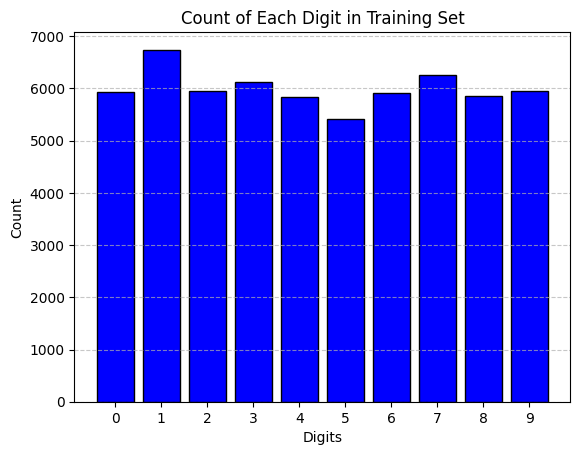

In [2]:
# Load the MNIST dataset, which is a large database of handwritten digits.
# The function returns two tuples: one for training data and one for testing data.
# Recalling, a Tuple is a collection of objects that are ordered and immutable.
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# First we convert the data to float32, which helps with numerical stability.
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Then we convert the training data to have a channel dimension, which is required for CNNs.
X_train = X_train[..., tf.newaxis] # Add the channel dimension
X_test = X_test[..., tf.newaxis] # Add the channel dimension
print(f"New shape for X_train for CNN's: {X_train.shape}")
print(f"New shape for X_test for CNN's: {X_test.shape}")

# Declare the types of the loaded data for clarity.
X_train: NDArray[np.float32]
Y_train: NDArray[np.uint8]
X_test: NDArray[np.float32]
Y_test: NDArray[np.uint8]

# We set the line width to a large value to avoid line breaks when printing the array.
with np.printoptions(linewidth=10000):
    # Print the shapes of the datasets to understand their dimensions.
    print("Shape of X_train:\t", X_train.shape)
    print("Shape of X_test:\t", X_test.shape)
    print("Shape of Y_train:\t", Y_train.shape)
    print("Shape of Y_test:\t", Y_test.shape)
    print(f"X_train data type: {X_train.dtype}")
    print(f"X_test data type: {X_test.dtype}")
    print(f"Y_train data type: {Y_train.dtype}")
    print(f"Y_test data type: {Y_test.dtype}")

    # Inspect a single data sample to see what it looks like.
    n: int = 1
    print(f"\nX_train data {n}-th element (a 28x28 pixel image):\n", np.squeeze(X_train[n]))
    print("\nAnd its corresponding label:\t", Y_train[n])

    # TODO: For using this data in a neural network,
    # Tensorflow/Keras expects the input data to be in a 1D or 2D array format where each row represents a single sample and each column represents a feature. The general format for the input shape is: (batch_size, feature_1, feature_2, ...)
    # However, we can use the tf.keras.layers.Flatten layer as the first layer in our sequential model.
    # This layer automatically flattens the input shape without the need for manual reshaping of our data.
    # For a Dense (fully connected) network: We must flatten each 28x28 image into a single 1D array of 784 pixels. The input shape for the first layer of our model would then be (None, 784), where None represents a variable batch size.
    # For a Convolutional Neural Network (CNN): We must add a channel dimension. Since the images are grayscale, there is only one channel. We would reshape the data to (number_of_images, 28, 28, 1). The input shape for the first layer (typically a Conv2D layer) would be (28, 28, 1). The batch size is handled automatically by Keras.
    # Scaling can also be performd in the model using a tf.keras.layers.Rescaling or keras.layers.Normalization layer as the first layer in our sequential model.
    # The advantage of using these layers is that they integrate seamlessly into the model architecture, ensuring that the data is preprocessed consistently during both training and inference.
    # This approach also simplifies the code by reducing the need for separate preprocessing steps outside the model definition.
    # And, it ensures that inference data is processed in the same way as training data, which is crucial for maintaining model performance.

    # Analyze the distribution of the digits in the training set.
    # `np.unique` finds the unique digit labels and `return_counts=True` counts their occurrences.
    dataset_distribution: Tuple[np.ndarray, np.ndarray] = np.unique(Y_train, return_counts=True)
    digits: np.ndarray = dataset_distribution[0]
    counts: np.ndarray = dataset_distribution[1]
    
    print("\n--- Dataset Distribution ---")
    print("Digits:\t\t\t", digits)
    print("Count per digit:\t", counts)
    
    # Calculate basic statistics on the distribution.
    avg: float = np.mean(counts)
    print(f"Average sample size:\t {avg:.2f}")
    
    max_count: np.int64 = np.max(counts)
    min_count: np.int64 = np.min(counts)
    print(f"Maximum sample size:\t {max_count}")
    print(f"Minimum sample size:\t {min_count}")

# Create a bar chart from the counts and digits to visualize the distribution.
plt.bar(digits, counts, color='blue', edgecolor='black')

# Set the title and labels for clarity.
plt.title('Count of Each Digit in Training Set')
plt.xlabel('Digits')
plt.ylabel('Count')

# Set x-ticks to be at the center of each bar and label them with the digit.
plt.xticks(digits)

# Add a grid for better readability.
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot.
plt.show()

## Dataset Analysis

The content and size of the training and testing datasets align with the description on the Kaggle MNIST dataset page, Hojjat, F. (2017). MNIST: The Most Famous Dataset in the World. Kaggle. Retrieved August 28, 2025, from https://www.kaggle.com/datasets/hojjatk/mnist-dataset. The plot of digit distribution shows a fairly homogeneous representation across all classes (digits 0 through 9). While the digit '1' is slightly oversampled and the digit '5' is slightly undersampled, the class imbalance is not significant enough to warrant further action for this assessment.

In a scenario where the distribution were to be significantly imbalanced and we needed to make it more homogeneous, we would use a technique called **resampling**. Resampling involves adjusting the distribution of the training data to be more balanced. There are two primary types:

- **Oversampling** involves duplicating samples from the underrepresented classes to increase their frequency.

- **Undersampling** involves removing samples from the overrepresented classes to reduce their frequency.

### Creating a Convolutional Neural Network (CNN)

in the following cells a simple 

In [3]:
# --- Set Seeds for Reproducibility ---

# This sets the global random seed for all TensorFlow operations.
# It ensures that things like model weight initialisation are the same every time.
# `tf.random.set_seed()` is the modern way to do this in TensorFlow 2.
tf.random.set_seed(1)

# This sets the random seed for all NumPy operations.
# This is important if we are creating our data using NumPy or using any
# NumPy functions that involve randomness.
np.random.seed(23)

In [11]:
# --- 1. Define the Model Architecture ---
# We are building a Sequential model, which is a simple, linear stack of layers.
mnist_model_cnn: Sequential = Sequential([
    # This is our preprocessing layer for Z-score scaling (normalisation with mean 0 and std. dev 1).
    # It learns the mean and standard deviation from the training data and applies it.
    # The input_shape must match a single sample from our data, which is a 28x28 image.
    # We define the normalisation and flattening inside the model so that
    # they are applied consistently during both training and inference.

    Input(shape=(28, 28, 1)),   # Important note: We must now include the number of channels as well, because the core operation
    # of a convolution is to operate on volumes of data. The convolution slides a small filter (kernel) across the input image.
    # This filter itself has a depth and must match the depth (channels) of the input. It processes all channels simultaneously 
    # to produce a single output value for that position, effectively combining spatial and channel-wise information.

    Normalization(),
    

    # --- Convolutional Block 1 ---
    # Conv2D layers act as feature detectors. They scan the image with filters (kernels)
    # to find patterns like edges, curves, etc.
    # 32 filters: The number of features to learn.
    # (3, 3) kernel_size: The size of the scanning window.
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    # Conv2D(filters=32, kernel_size=(3, 3), padding='same', strides=1, activation='relu'),

    # MaxPooling2D downsamples the feature map, reducing dimensionality and making
    # the model more robust to variations in the position of features.
    MaxPooling2D(pool_size=(2, 2)),

    # --- Convolutional Block 2 ---
    # We add another Conv2D layer to learn more complex patterns from the features
    # detected by the first layer. It's common to increase the number of filters.
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),


    # The Flatten layer converts the 2D feature maps from the final pooling layer
    # into a 1D vector, preparing the data for the final classification layers.
    Flatten(),

    # --- Classification Head ---
    # A Dropout layer is added for regularisation. It randomly sets a fraction of
    # input units to 0 at each update during training, which helps prevent overfitting.
    Dropout(0.5), # (50% of the neurons will be dropped)
    # This Dense layer interprets the features extracted by the convolutional layers.
    Dense(units=128, activation='relu'),
    
    # This is our output layer. It remains the same, with 10 neurons for digits 0-9
    # and 'softmax' to provide a probability distribution.
    Dense(units=10, activation='softmax')
], name="CNN")

# We can print a summary of the model's architecture to see the layers and parameter counts.
print("\n--- Model Architecture ---")
mnist_model_cnn.summary()

# for n in range(len(mnist_model_cnn.layers)):
#     print(f"MNIST model layer[{n}: {mnist_model_cnn.layers[n]}]")

# --- 2. Adapt the Normalisation Layer ---
# Before training, we must let the Normalization layer calculate the mean and
# variance of our training data. The .adapt() method does this for us.
print("Adapting the normalisation layer to the training data...")
mnist_model_cnn.layers[0].adapt(X_train) 
print("Adaptation complete.")


# --- 3. Configure and Compile the Model ---
# We configure the optimiser and the list of metrics we want to track.
adam_optimizer: Adam = Adam(learning_rate=0.001)
metrics_list: list = ['accuracy'] #, Precision(), Recall()] Precision and Recall can be used for Binary Classification problems only.

# The compile step brings everything together and prepares the model for training.
mnist_model_cnn.compile(
    optimizer=adam_optimizer,
    loss='sparse_categorical_crossentropy', # Best for integer labels in multi-class classification.
    metrics=metrics_list
)

# Define the filepath for the saved model.
# The placeholders {epoch:02d} and {val_accuracy:.4f} will be automatically filled in.
folder_name = 'CNN Models'
filepath = f'{folder_name}/best_model_epoch-{{epoch:02d}}_val_acc-{{val_accuracy:.4f}}.keras'

# Create a ModelCheckpoint callback so we can save the best model during training. Note: every epoch the model is evaluated
# on validation accuracy. If the validation accuracy improves, the model will be saved. If not, it will not be saved.
model_checkpoint_callback = ModelCheckpoint(
    filepath=filepath,
    monitor='val_accuracy',      # Monitor the validation accuracy
    mode='max',                  # The direction of improvement (higher is better for accuracy). Had we chosen Min, then we would be looking for the lowest validation accuracy. 
    save_best_only=True,         # Only save the model if `val_accuracy` has improved
    verbose=1                    # Print a message when the model is saved
)

# --- 4. Train the Model ---
# This is where the learning happens. The .fit() method trains the model on our data.
# The 'history' object will store the loss and metric values for each epoch.
history: History = mnist_model_cnn.fit(
    X_train,
    Y_train,
    epochs=5,
    validation_split=0.1, # We hold back 10% of the training data to validate performance.
    batch_size=64,
    verbose=1, # We set verbose=1 to see the training progress bar.
    callbacks=[model_checkpoint_callback],  # We add the callback here in the fit method so that we can save the best model during training.
)


--- Model Architecture ---


Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization) │ (None, 28, 28, 1)      │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,037 (879.05 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 3 (16.00 B)

Adapting the normalisation layer to the training data...
Adaptation complete.
Epoch 1/5
842/844 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8717 - loss: 0.4037
Epoch 1: val_accuracy improved from None to 0.98733, saving model to CNN Models/best_model_epoch-01_val_acc-0.9873.keras
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9402 - loss: 0.1899 - val_accuracy: 0.9873 - val_loss: 0.0472
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9759 - loss: 0.0742
Epoch 2: val_accuracy improved from 0.98733 to 0.99050, saving model to CNN Models/best_model_epoch-02_val_acc-0.9905.keras
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9773 - loss: 0.0701 - val_accuracy: 0.9905 - val_loss: 0.0347
Epoch 3/5
842/844 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9835 - loss: 0.0536
Epoch 3: val_accuracy improved from 0.99050 to 0.99183, saving model to CNN Models/best_model_epoch-03_val_acc-0.9918.keras
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.98

In [8]:
# --- Define the Plotting Function ---
def plot_training_history(history: History):
    # summarize history for accuracy
    plt.plot(history.history['accuracy']) # the train accuracy
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss']) # the train loss
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

### Plot the results of every epoc

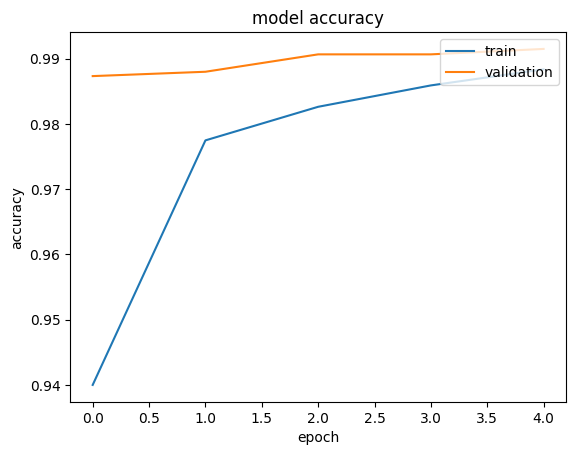

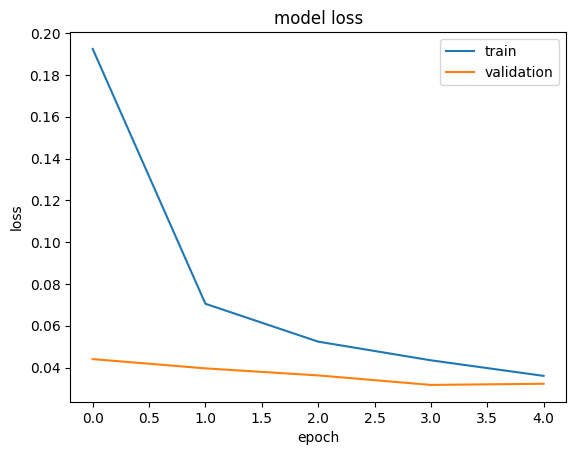

In [10]:
plot_training_history(history)

## Testing the model on the held-out test set
We test the model on the test data, which is data that the model has never seen before. Then we verify the model's real-world accuracy. It is expected that this does not deviate much from the validation sets, because the MNIST dataset contains images that are very clean and simple:
- They are small (28 x 28 pixels only).
- The digits are centered and normalised in size.
- The background is a solid colour with no distracting noise.
  
Because of this simplicity, the patterns that differentiate one digit from another (e.g., a "1" is a vertical line, an "8" is two loops) are very strong and easy for our model to learn.

In [14]:
# --- 1. Define the folder where our models are saved ---
folder_name = 'CNN Models' # Note that this folder should exist before running the code. It is already defined in the training section, but repeated here so this code
# can be copied to other notebooks (e.g. Part 2 of the assessment)

# --- 2. Find the best model file in that folder ---
best_model_file = None
best_val_accuracy = -1  # We start with a very low number, so any accuracy found will be higher.

# Regex pattern to find the validation accuracy in the filename
# It looks for the text 'val_acc-' followed by digits and a dot.
pattern = re.compile(r"val_acc-([\d.]+)\.keras")

# Loop through all files in the specified folder
for filename in os.listdir(folder_name):
    match = pattern.search(filename)
    if match:
        # If the filename matches our pattern, extract the accuracy
        val_accuracy = float(match.group(1))
        
        # Check if this model is better than the best one we've found so far
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_model_file = filename

# --- 3. Load the best model ---
if best_model_file:
    # Construct the full path to the best model file
    best_model_path = os.path.join(folder_name, best_model_file)
    print(f"Found best model: {best_model_path}")
    
    # Load the entire model
    loaded_model = tf.keras.models.load_model(best_model_path)
    
    # You can now use this model to evaluate or predict
    print("\n--- Best Model Summary ---")
    loaded_model.summary()

    print("\n--- Evaluating model performance on the test set ---")
    # Use the .evaluate() method to run inference on the test data
    loss, accuracy = loaded_model.evaluate(X_test, Y_test, verbose=2)
    
    print(f"\nTest Set Loss: {loss:.4f}")
    print(f"Test Set Accuracy: {accuracy:.4f}")

else:
    print(f"No model files found in the folder '{folder_name}' matching the expected pattern.")

Found best model: CNN Models\best_model_epoch-04_val_acc-0.9922.keras

--- Best Model Summary ---


Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization) │ (None, 28, 28, 1)      │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,107 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 3 (16.00 B)

 Optimizer params: 450,070 (1.72 MB)


--- Evaluating model performance on the test set ---
313/313 - 2s - 5ms/step - accuracy: 0.9913 - loss: 0.0260

Test Set Loss: 0.0260
Test Set Accuracy: 0.9913
